EDA & Data Cleaning

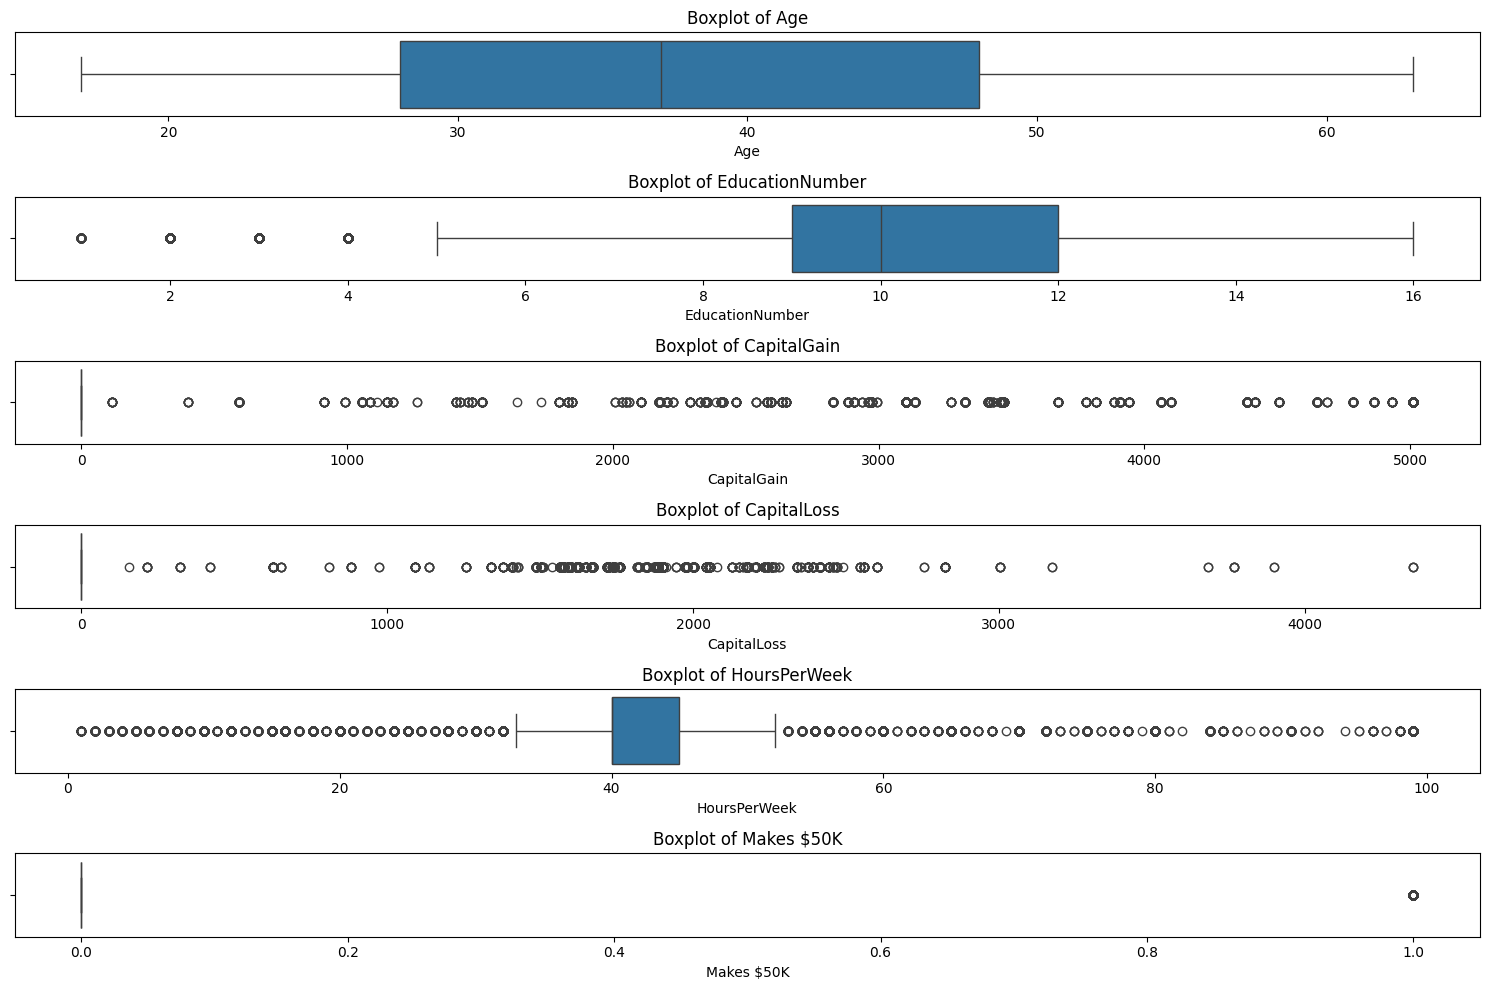

Missing Data:
Age                0
Workclass          0
Education          0
EducationNumber    0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
Nationality        0
Makes $50K         0
dtype: int64

Data Description:
                Age  EducationNumber   CapitalGain   CapitalLoss  \
count  48842.000000     48842.000000  48842.000000  48842.000000   
mean      38.301134        10.078089    350.200504     87.502314   
std       12.928091         2.570973   1216.244535    403.004552   
min       17.000000         1.000000      0.000000      0.000000   
25%       28.000000         9.000000      0.000000      0.000000   
50%       37.000000        10.000000      0.000000      0.000000   
75%       48.000000        12.000000      0.000000      0.000000   
max       63.000000        16.000000   5013.000000   4356.000000   

       HoursPerWeek    Makes $50K  
count  4884

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import numpy as np

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Legacy/1994%20Income%20Data%20-%20Full.csv'
data = pd.read_csv(url)

# Drop the fnlwgt column
data.drop(columns=['FNLWGT'], inplace=True)

# Replace " ?" with NaN
data.replace(' ?', pd.NA, inplace=True)

# Replace missing values with specified defaults
data['Occupation'] = data['Occupation'].fillna('Other-service')
data['Workclass'] = data['Workclass'].fillna('Other')
data['Nationality'] = data['Nationality'].fillna('United-States')

# Winsorize the high values for Age and Capital Gain down to the 95th percentile
cols_to_winsorize = ['Age', 'CapitalGain']
for col in cols_to_winsorize:
    # Remove NaN values and convert to numpy array
    col_data = data[col].dropna().to_numpy()
    
    # Apply winsorization
    winsorized_data = winsorize(col_data, limits=(0, 0.05))
    
    # Update the original dataframe
    data.loc[data[col].notna(), col] = winsorized_data

# Check for missing data
missing_data = data.isna().sum()

# Describe the data for initial insights
data_description = data.describe()

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Detect outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Show missing data
print("Missing Data:")
print(missing_data)

# Display initial description of the data
print("\nData Description:")
print(data_description)

Feature Engineering

In [37]:
# Create USANational column
data['USANational'] = (data['Nationality'] == 'United-States').astype(int)

# Clean the Education column by stripping whitespace
data['Education'] = data['Education'].str.strip()

# Create EducationLevel column
education_mapping = {
    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 0,
    '7th-8th': 0,
    '9th': 0.1,
    '10th': 0.1,
    '11th': 0.2,
    '12th': 0.2,
    'HS-grad': 0.3,
    'Some-college': 0.5,
    'Prof-school': 0.55,
    'Assoc-acdm': 0.6,
    'Assoc-voc': 0.6,
    'Bachelors': 0.7,
    'Masters': 0.8,
    'Doctorate': 1
}
data['EducationLevel'] = data['Education'].map(education_mapping)

# Create columns based on Workclass
workclass_mapping = {
    'Federal-gov': {'PublicSector': 1, 'PrivateSector': 0, 'NoPay': 0},
    'Local-gov': {'PublicSector': 1, 'PrivateSector': 0, 'NoPay': 0},
    'Never-worked': {'PublicSector': 0, 'PrivateSector': 0, 'NoPay': 1},
    'Private': {'PublicSector': 0, 'PrivateSector': 1, 'NoPay': 0},
    'Self-emp-inc': {'PublicSector': 0, 'PrivateSector': 1, 'NoPay': 0},
    'Self-emp-not-inc': {'PublicSector': 0, 'PrivateSector': 1, 'NoPay': 0},
    'State-gov': {'PublicSector': 1, 'PrivateSector': 0, 'NoPay': 0},
    'Without-pay': {'PublicSector': 0, 'PrivateSector': 0, 'NoPay': 1}
}

for sector in ['PublicSector', 'PrivateSector', 'NoPay']:
    data[sector] = data['Workclass'].map(lambda x: workclass_mapping.get(x, {}).get(sector, 0))

# Rename the final cleaned dataset
CleanedDataset = data.copy()

# Display the first few rows of the updated dataset
print(CleanedDataset[['USANational', 'EducationLevel', 'PublicSector', 'PrivateSector', 'NoPay']].head())

# Check for any null values in the new columns
print("\nNull values in new columns:")
print(CleanedDataset[['USANational', 'EducationLevel', 'PublicSector', 'PrivateSector', 'NoPay']].isnull().sum())

   USANational  EducationLevel  PublicSector  PrivateSector  NoPay
0            0             0.7             0              0      0
1            0             0.7             0              0      0
2            0             0.3             0              0      0
3            0             0.2             0              0      0
4            0             0.7             0              0      0

Null values in new columns:
USANational       0
EducationLevel    0
PublicSector      0
PrivateSector     0
NoPay             0
dtype: int64


Checking for Imbalance

Class distribution:
Class 0: 37155 samples (76.07%)
Class 1: 11687 samples (23.93%)


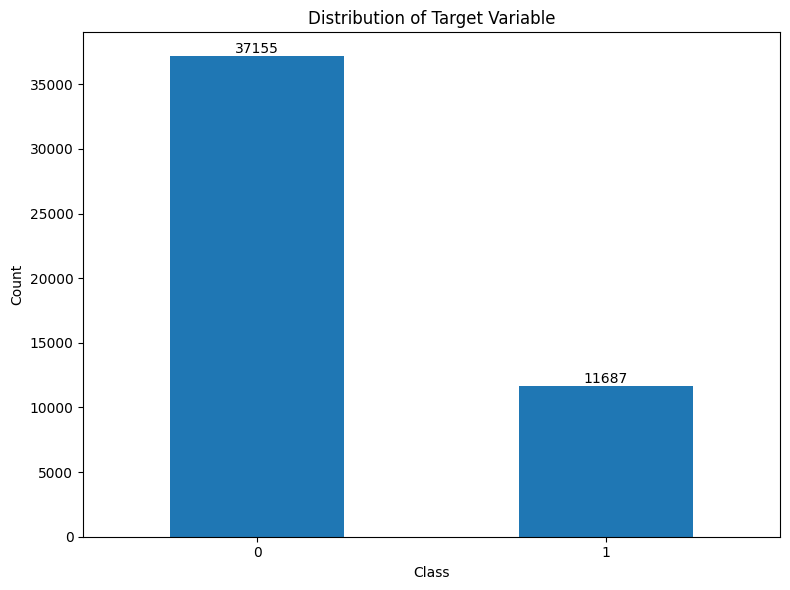


Imbalance ratio: 3.18


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Count the occurrences of each class
class_counts = data['Makes $50K'].value_counts()

# Calculate percentages
class_percentages = class_counts / len(data) * 100

# Print the counts and percentages
print("Class distribution:")
for class_label, count in class_counts.items():
    percentage = class_percentages[class_label]
    print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

# Visualize the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(class_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

Modelling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tabulate import tabulate

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Drop the specified columns
data = data.drop(columns=['Education', 'EducationNumber', 'Nationality'])

# Defining features and target variable
X = data.drop(columns=['Makes $50K'])
y = data['Makes $50K']

# Splitting the dataset into training+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the temp set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Defining the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='linear')
}

# Training and evaluating the models
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred_test = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1_0 = f1_score(y_test, y_pred_test, pos_label=0)
    test_f1_1 = f1_score(y_test, y_pred_test, pos_label=1)
    
    # Evaluate on validation set
    y_pred_val = pipeline.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_f1_0 = f1_score(y_val, y_pred_val, pos_label=0)
    val_f1_1 = f1_score(y_val, y_pred_val, pos_label=1)
    
    results.append([name, test_accuracy, val_accuracy, test_f1_0, test_f1_1, val_f1_0, val_f1_1])
    
    print(f'{name}:')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test Classification Report:\n{classification_report(y_test, y_pred_test)}')
    print(f'Validation Accuracy: {val_accuracy}')
    print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val)}\n')

# Summarize results using tabulate
headers = ["Model", "Test Accuracy", "Validation Accuracy", "Test F1 (0)", "Test F1 (1)", "Val F1 (0)", "Val F1 (1)"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".3f"))

Logistic Regression:
Test Accuracy: 0.8470672535571706
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7414
           1       0.73      0.58      0.65      2355

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Validation Accuracy: 0.8449175964786569
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7399
           1       0.72      0.59      0.65      2370

    accuracy                           0.84      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.84      0.84      9769


Decision Tree:
Test Accuracy: 0.8117514586958747
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7414
  

Adjusting Models to Deal with Imbalance

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Drop the specified columns
data = data.drop(columns=['Education', 'EducationNumber', 'Nationality'])

# Defining features and target variable
X = data.drop(columns=['Makes $50K'])
y = data['Makes $50K']

# Splitting the dataset into training+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the temp set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Defining the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Initializing the models with class weights
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight=class_weight_dict),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=class_weight_dict),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='linear', class_weight=class_weight_dict)
}

# Training and evaluating the models
results = []

for name, model in models.items():
    # Preprocess the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_val_preprocessed = preprocessor.transform(X_val)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
    
    # Fit the model on resampled data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate on test set
    y_pred_test = model.predict(X_test_preprocessed)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1_0 = f1_score(y_test, y_pred_test, pos_label=0)
    test_f1_1 = f1_score(y_test, y_pred_test, pos_label=1)
    
    # Evaluate on validation set
    y_pred_val = model.predict(X_val_preprocessed)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_f1_0 = f1_score(y_val, y_pred_val, pos_label=0)
    val_f1_1 = f1_score(y_val, y_pred_val, pos_label=1)
    
    results.append([name, test_accuracy, val_accuracy, test_f1_0, test_f1_1, val_f1_0, val_f1_1])
    
    print(f'{name}:')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test Classification Report:\n{classification_report(y_test, y_pred_test)}')
    print(f'Validation Accuracy: {val_accuracy}')
    print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val)}\n')

# Summarize results using tabulate
headers = ["Model", "Test Accuracy", "Validation Accuracy", "Test F1 (0)", "Test F1 (1)", "Val F1 (0)", "Val F1 (1)"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".3f"))

Logistic Regression:
Test Accuracy: 0.7087726481727915
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.63      0.77      7431
           1       0.45      0.95      0.61      2338

    accuracy                           0.71      9769
   macro avg       0.71      0.79      0.69      9769
weighted avg       0.85      0.71      0.73      9769

Validation Accuracy: 0.7116388576108097
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.77      7432
           1       0.45      0.95      0.61      2337

    accuracy                           0.71      9769
   macro avg       0.71      0.79      0.69      9769
weighted avg       0.85      0.71      0.73      9769


Decision Tree:
Test Accuracy: 0.8001842563210154
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7431
  

Making an Ensemble Model of Random Forest + Gradient Boosting

Also, ensuring that the Validation Dataset is not Sampled with SMOTE

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Drop the specified columns
data = data.drop(columns=['Education', 'EducationNumber', 'Nationality'])

# Defining features and target variable
X = data.drop(columns=['Makes $50K'])
y = data['Makes $50K']

# Splitting the dataset into train+test and validation sets
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the train_test set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Defining the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Initializing the models
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict, n_estimators=100)
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Create the ensemble model
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    voting='soft'
)

# List of models to evaluate
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Ensemble (RF + GB)': ensemble
}

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)

# Apply SMOTE to training and test data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_preprocessed, y_test)

# Training and evaluating the models
results = []

for name, model in models.items():
    # Fit the model on resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate on resampled test set
    y_pred_test = model.predict(X_test_resampled)
    test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
    test_f1_0 = f1_score(y_test_resampled, y_pred_test, pos_label=0)
    test_f1_1 = f1_score(y_test_resampled, y_pred_test, pos_label=1)
    
    # Evaluate on validation set (no SMOTE)
    y_pred_val = model.predict(X_val_preprocessed)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_f1_0 = f1_score(y_val, y_pred_val, pos_label=0)
    val_f1_1 = f1_score(y_val, y_pred_val, pos_label=1)
    
    results.append([name, test_accuracy, val_accuracy, test_f1_0, test_f1_1, val_f1_0, val_f1_1])
    
    print(f'{name}:')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test Classification Report:\n{classification_report(y_test_resampled, y_pred_test)}')
    print(f'Validation Accuracy: {val_accuracy}')
    print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val)}\n')

# Summarize results using tabulate
headers = ["Model", "Test Accuracy", "Validation Accuracy", "Test F1 (0)", "Test F1 (1)", "Val F1 (0)", "Val F1 (1)"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".3f"))

Random Forest:
Test Accuracy: 0.8495021528525296
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7432
           1       0.87      0.83      0.85      7432

    accuracy                           0.85     14864
   macro avg       0.85      0.85      0.85     14864
weighted avg       0.85      0.85      0.85     14864

Validation Accuracy: 0.8295629030607022
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7431
           1       0.63      0.69      0.66      2338

    accuracy                           0.83      9769
   macro avg       0.77      0.78      0.77      9769
weighted avg       0.84      0.83      0.83      9769


Gradient Boosting:
Test Accuracy: 0.8710306781485468
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7432
    

Checking which Features are Most Important


Top 20 Most Important Features for Gradient Boosting:
                                    feature  importance
20  cat__Marital Status_ Married-civ-spouse    0.456988
5                       num__EducationLevel    0.168256
1                          num__CapitalGain    0.115415
0                                  num__Age    0.095336
3                         num__HoursPerWeek    0.064903
2                          num__CapitalLoss    0.017722
34          cat__Occupation_ Prof-specialty    0.014566
28         cat__Occupation_ Exec-managerial    0.014206
32           cat__Occupation_ Other-service    0.008650
50                         cat__Race_ White    0.008266
29         cat__Occupation_ Farming-fishing    0.005935
41         cat__Relationship_ Not-in-family    0.004317
51                         cat__Sex_ Female    0.002967
14         cat__Workclass_ Self-emp-not-inc    0.002780
45                  cat__Relationship_ Wife    0.002387
9               cat__Workclass_ Federal-gov    0.

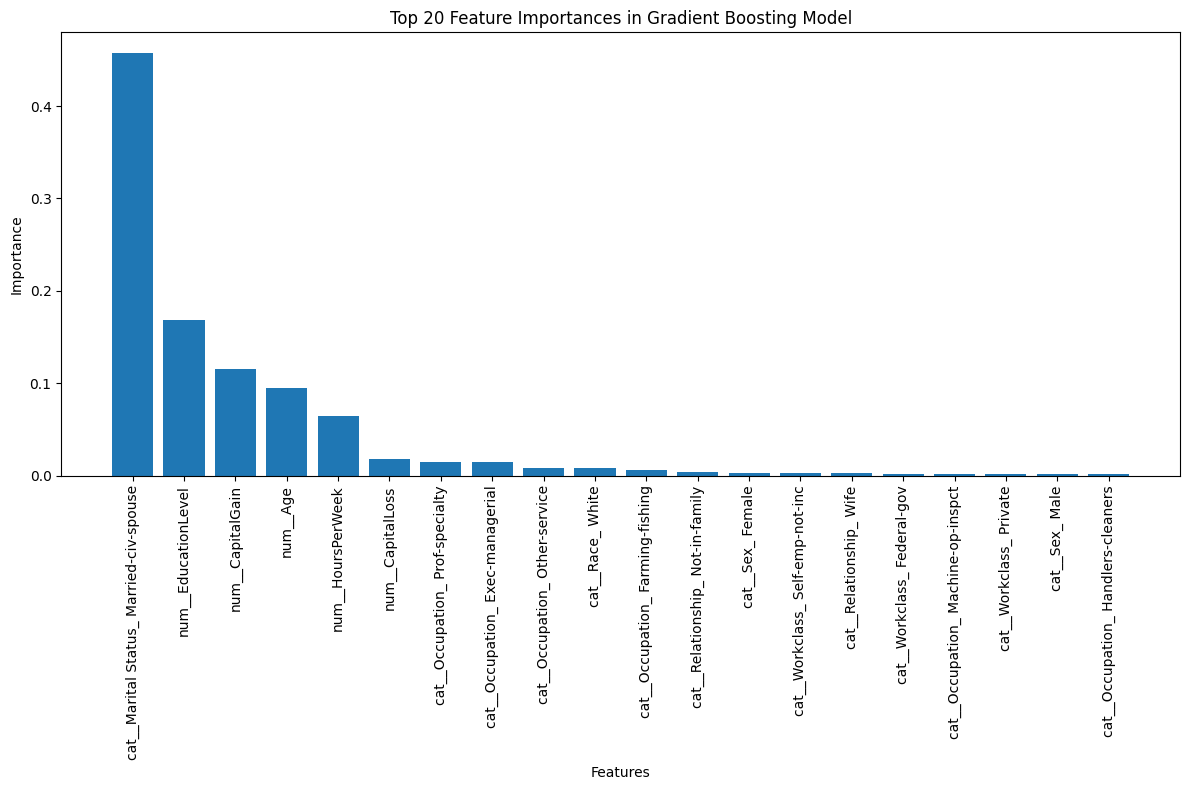

In [42]:
# Extract feature importance from Gradient Boosting model
gb_model = models['Gradient Boosting']
feature_importance = gb_model.feature_importances_

# Get feature names
feature_names = preprocessor.get_feature_names_out()

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Display top 20 most important features
print("\nTop 20 Most Important Features for Gradient Boosting:")
print(feature_importance_df.head(20))

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['feature'][:20], feature_importance_df['importance'][:20])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances in Gradient Boosting Model')
plt.tight_layout()
plt.show()

Focusing on Just Gradient Boosting with Important Features

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Drop the specified columns
data = data.drop(columns=['Education', 'EducationNumber', 'Nationality'])

# Defining features and target variable
X = data.drop(columns=['Makes $50K'])
y = data['Makes $50K']

# Splitting the dataset into train+test and validation sets
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the train_test set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)

# Define the most important features
important_features = ['Marital Status', 'EducationLevel', 'CapitalGain', 'Age', 'HoursPerWeek', 
                      'CapitalLoss', 'Occupation', 'Race', 'Relationship', 'Sex', 'Workclass']

# Identify categorical and numerical columns among important features
categorical_cols = X[important_features].select_dtypes(include=['object']).columns
numerical_cols = X[important_features].select_dtypes(include=['number']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train[important_features])
X_test_preprocessed = preprocessor.transform(X_test[important_features])
X_val_preprocessed = preprocessor.transform(X_val[important_features])

# Apply SMOTE to training and test data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_preprocessed, y_test)

# Train the model
gb.fit(X_train_resampled, y_train_resampled)

# Evaluate on resampled test set
y_pred_test = gb.predict(X_test_resampled)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
test_f1_0 = f1_score(y_test_resampled, y_pred_test, pos_label=0)
test_f1_1 = f1_score(y_test_resampled, y_pred_test, pos_label=1)

# Evaluate on validation set (no SMOTE)
y_pred_val = gb.predict(X_val_preprocessed)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_f1_0 = f1_score(y_val, y_pred_val, pos_label=0)
val_f1_1 = f1_score(y_val, y_pred_val, pos_label=1)

# Print results
print("Gradient Boosting (Important Features):")
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Classification Report:\n{classification_report(y_test_resampled, y_pred_test)}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val)}\n')

Gradient Boosting (Important Features):
Test Accuracy: 0.8704924650161464
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.86      7432
           1       0.84      0.92      0.88      7432

    accuracy                           0.87     14864
   macro avg       0.87      0.87      0.87     14864
weighted avg       0.87      0.87      0.87     14864

Validation Accuracy: 0.8291534445695568
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7431
           1       0.61      0.82      0.70      2338

    accuracy                           0.83      9769
   macro avg       0.77      0.83      0.79      9769
weighted avg       0.86      0.83      0.84      9769




Hyperparameter Tuning

In [44]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import numpy as np
from scipy.stats import randint, uniform

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Drop the specified columns
data = data.drop(columns=['Education', 'EducationNumber', 'Nationality'])

# Defining features and target variable
X = data.drop(columns=['Makes $50K'])
y = data['Makes $50K']

# Splitting the dataset into train+test and validation sets
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the train_test set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)

# Define the most important features
important_features = ['Marital Status', 'EducationLevel', 'CapitalGain', 'Age', 'HoursPerWeek', 
                      'CapitalLoss', 'Occupation', 'Race', 'Relationship', 'Sex', 'Workclass']

# Identify categorical and numerical columns among important features
categorical_cols = X[important_features].select_dtypes(include=['object']).columns
numerical_cols = X[important_features].select_dtypes(include=['number']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train[important_features])
X_test_preprocessed = preprocessor.transform(X_test[important_features])
X_val_preprocessed = preprocessor.transform(X_val[important_features])

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.19),  # from 0.01 to 0.2
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),  # from 0.6 to 1.0
    'max_features': uniform(0.1, 0.9)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("Best parameters found:")
print(random_search.best_params_)

# Use the best model for predictions
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred_test = best_model.predict(X_test_preprocessed)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_0 = f1_score(y_test, y_pred_test, pos_label=0)
test_f1_1 = f1_score(y_test, y_pred_test, pos_label=1)

# Evaluate on validation set
y_pred_val = best_model.predict(X_val_preprocessed)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_f1_0 = f1_score(y_val, y_pred_val, pos_label=0)
val_f1_1 = f1_score(y_val, y_pred_val, pos_label=1)

# Print results
print("\nGradient Boosting (Tuned, Important Features):")
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Classification Report:\n{classification_report(y_test, y_pred_test)}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val)}\n')

# Summarize results
results = [["Gradient Boosting (Tuned, Important Features)", test_accuracy, val_accuracy, test_f1_0, test_f1_1, val_f1_0, val_f1_1]]
headers = ["Model", "Test Accuracy", "Validation Accuracy", "Test F1 (0)", "Test F1 (1)", "Val F1 (0)", "Val F1 (1)"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".3f"))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:
{'learning_rate': 0.07274798051362871, 'max_depth': 8, 'max_features': 0.5433625938617732, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 416, 'subsample': 0.9291161407506773}

Gradient Boosting (Tuned, Important Features):
Test Accuracy: 0.8534138601699253
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7432
           1       0.69      0.71      0.70      2337

    accuracy                           0.85      9769
   macro avg       0.80      0.81      0.80      9769
weighted avg       0.86      0.85      0.85      9769

Validation Accuracy: 0.8580202681953117
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7431
           1       0.70      0.71      0.71      2338

    accuracy                           0.86    

Cross-validation of the Model Above

In [45]:
from sklearn.model_selection import cross_val_score

# Prepare the full dataset for cross-validation
X_full = preprocessor.fit_transform(X[important_features])
y_full = y

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_full, y_full, cv=5, scoring='f1_weighted')

# Print the cross-validation results
print("\nCross-Validation Results:")
print(f"F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.3f}")
print(f"Standard Deviation: {cv_scores.std():.3f}")


Cross-Validation Results:
F1 Scores: [0.86063708 0.8581159  0.86250419 0.85531536 0.85652436]
Mean F1 Score: 0.859
Standard Deviation: 0.003


Trying Neural Networks

In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import numpy as np
import scipy.sparse as sp

# Assuming CleanedDataset is already loaded
data = CleanedDataset

# Drop the specified columns
data = data.drop(columns=['Education', 'EducationNumber', 'Nationality'])

# Defining features and target variable
X = data.drop(columns=['Makes $50K'])
y = data['Makes $50K']

# Splitting the dataset into train+test and validation sets
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the train_test set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)

# Define the most important features
important_features = ['Marital Status', 'EducationLevel', 'CapitalGain', 'Age', 'HoursPerWeek', 
                      'CapitalLoss', 'Occupation', 'Race', 'Relationship', 'Sex', 'Workclass']

# Identify categorical and numerical columns among important features
categorical_cols = X[important_features].select_dtypes(include=['object']).columns
numerical_cols = X[important_features].select_dtypes(include=['number']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train[important_features])
X_test_preprocessed = preprocessor.transform(X_test[important_features])
X_val_preprocessed = preprocessor.transform(X_val[important_features])

# Convert sparse matrices to dense numpy arrays
X_train_preprocessed = X_train_preprocessed.toarray() if sp.issparse(X_train_preprocessed) else X_train_preprocessed
X_test_preprocessed = X_test_preprocessed.toarray() if sp.issparse(X_test_preprocessed) else X_test_preprocessed
X_val_preprocessed = X_val_preprocessed.toarray() if sp.issparse(X_val_preprocessed) else X_val_preprocessed

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_preprocessed, y_test)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_preprocessed, y_val)).batch(32)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, verbose=1)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_dataset)
y_pred_test = (model.predict(X_test_preprocessed) > 0.5).astype("int32").flatten()
test_f1_0 = f1_score(y_test, y_pred_test, pos_label=0)
test_f1_1 = f1_score(y_test, y_pred_test, pos_label=1)

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_dataset)
y_pred_val = (model.predict(X_val_preprocessed) > 0.5).astype("int32").flatten()
val_f1_0 = f1_score(y_val, y_pred_val, pos_label=0)
val_f1_1 = f1_score(y_val, y_pred_val, pos_label=1)

# Print results
print("\nNeural Network (TensorFlow):")
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Classification Report:\n{classification_report(y_test, y_pred_test)}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val)}\n')

# Summarize results
results = [["Neural Network (TensorFlow)", test_accuracy, val_accuracy, test_f1_0, test_f1_1, val_f1_0, val_f1_1]]
headers = ["Model", "Test Accuracy", "Validation Accuracy", "Test F1 (0)", "Test F1 (1)", "Val F1 (0)", "Val F1 (1)"]
print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".3f"))

Epoch 1/50
1394/1394 [==============================] - 5s 4ms/step - loss: 0.3999 - accuracy: 0.8323 - val_loss: 2.6524 - val_accuracy: 0.2393
Epoch 2/50
1394/1394 [==============================] - 5s 3ms/step - loss: 0.4294 - accuracy: 0.8250 - val_loss: 2.2263 - val_accuracy: 0.3495
Epoch 3/50
1394/1394 [==============================] - 5s 3ms/step - loss: 0.4049 - accuracy: 0.8325 - val_loss: 2.0346 - val_accuracy: 0.4352
Epoch 4/50
1394/1394 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8370 - val_loss: 2.0964 - val_accuracy: 0.4501
Epoch 5/50
1394/1394 [==============================] - 5s 3ms/step - loss: 0.3862 - accuracy: 0.8421 - val_loss: 2.2781 - val_accuracy: 0.4277
Epoch 6/50
1394/1394 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8464 - val_loss: 1.9827 - val_accuracy: 0.5133
Epoch 7/50
1394/1394 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8481 - val_loss: 2.1896 - val_accuracy: